## Credit Card Fixing Imbalanced Dataset

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

LABELS = ["Normal", "Fraud"]

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
x = data.iloc[:,0:30]  # Independent var
y = data.iloc[:,-1]   #Dependent var

In [5]:
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

## Exploratory Data Analysis

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes

Class
0    284315
1       492
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

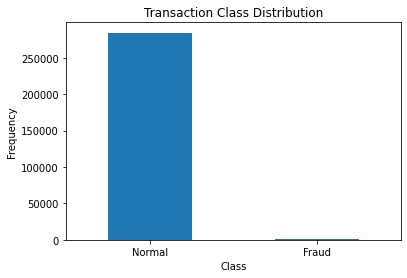

In [9]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)   # rot=0 to make label horizontal

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [10]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [11]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [12]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train,Y_train)
Y_Test_Pred = clf.predict(X_test)
print(accuracy_score(Y_test,Y_Test_Pred))
print(classification_report(Y_test,Y_Test_Pred))

0.9986306660580738
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.56      0.59        98

    accuracy                           1.00     56962
   macro avg       0.81      0.78      0.79     56962
weighted avg       1.00      1.00      1.00     56962



# RandomOverSampler

In [13]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_res1,y_res1= ros.fit_resample(x,y)

In [14]:
X_res1.shape,y_res1.shape

((568630, 30), (568630,))

In [15]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res1)))


Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [16]:
print(X_res1.shape)
print(y_res1.shape)

(568630, 30)
(568630,)


# SMOTE (Synthetic Minority Oversampling Technique)

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
smk = SMOTE()
x_res,y_res=smk.fit_resample(x,y)

In [19]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [20]:
x_res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,166832.786930,-1.885589,-1.119023,-1.137155,1.023650,-0.031502,0.398165,3.623411,-1.111857,-0.066097,...,0.033929,-0.294371,0.584331,0.478855,0.750871,-0.144522,-0.586760,0.491925,-0.089028,613.188455
568626,96657.552243,-3.526805,4.050010,-3.549002,2.143951,-3.319091,1.420018,-9.107334,-11.195960,-0.546447,...,3.468555,-5.141198,2.756823,0.818413,-0.251406,-0.253473,-0.503122,-0.228827,-0.050736,2.834505
568627,41683.181979,-4.261420,3.792959,-5.871184,3.949041,-4.280760,-0.892441,-5.296147,1.274976,-2.257631,...,0.043385,2.168402,0.010801,0.021816,0.015996,-0.228546,-0.161984,0.619363,0.068361,153.772603
568628,164176.275561,-6.394326,0.121222,-4.787928,2.090678,1.095475,0.445915,-5.555467,-8.204485,-1.218227,...,-0.341954,-3.419091,1.887110,0.746393,-0.048724,0.520186,1.040211,1.066007,-0.422707,25.864534


In [21]:
x_res.shape,y_res.shape


((568630, 30), (568630,))

In [22]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [23]:
print(x_res.shape)
print(y_res.shape)

(568630, 30)
(568630,)


# Apply classification Algorithm (SMOTE)

In [24]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x_res,y_res,test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train1,Y_train1)

In [25]:
Y_Test_Pred = clf.predict(X_test1)

In [26]:
print(accuracy_score(Y_test1,Y_Test_Pred))
print(classification_report(Y_test1,Y_Test_Pred))

0.972847018271987
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56750
           1       0.98      0.96      0.97     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



# Apply classification Algorithm (Oversampling)

In [27]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_res1,y_res1,test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train2,Y_train2)

In [28]:
Y_Test_Pred = clf.predict(X_test2)
print(accuracy_score(Y_test2,Y_Test_Pred))
print(classification_report(Y_test2,Y_Test_Pred))

0.9389497564321263
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     56750
           1       0.96      0.91      0.94     56976

    accuracy                           0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726

